<a href="https://colab.research.google.com/github/osmanmerdan/Infectious-Disease-Data-Analysis-Projects/blob/main/Foodborne_Disease_Outbreaks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of Foodborne Disease Outbreaks, 1998-2015 (CDC Data)

- According to WHO, unsafe food causes 600 million cases of foodborne diseases and 420 000 deaths each year worldwide. Fifty-six million people die every year because of foodborne illnesses. (1)   
- Foodborne outbreaks have become more serious due to globalization and active food trade. For example, in 2011  Escherichia coli O104:H4 outbreak in Germany was spread to other countries, initially causing 53 deaths worldwide. (2) Bacteria and viruses are major causes of foodborne related illnesses. Globally, the number of foodborne illnesses caused by bacteria is 226.526.634. Viruses  and parasites cause 138,513,782 and 10,284,561 cases, respectively. (3)  Parasites and toxins can also cause foodborne diseases.
- This project is based on the data on foodborne disease outbreaks reported to CDC from 1998 through 2015.
- Columns include year, state (outbreaks occurring in more than one state are listed as "multistate"), location where the food was prepared, reported food vehicle and contaminated ingredient, etiology (the pathogen, toxin, or chemical that caused the illnesses), status (whether the etiology was confirmed or suspected), total illnesses, hospitalizations, and fatalities.
- Not identified etiology (species), or ingredients were left blank.
- Data used in presented project can be accessed through Kaggle (https://www.kaggle.com/datasets/cdc/foodborne-diseases).


## Data Preperation
***

- Downloading and preperation of the data.

In [ ]:
!pip install jovian opendatasets --upgrade --quiet

- Let's begin by downloading the data, and listing the files within the dataset.

In [ ]:
dataset_url = 'https://www.kaggle.com/datasets/cdc/foodborne-diseases' 

In [ ]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in "./foodborne-diseases" (use force=True to force download)


The dataset has been downloaded and extracted.

In [ ]:
data_dir = './foodborne-diseases'

In [ ]:
import os
os.listdir(data_dir)

['outbreaks.csv']

## Data Preparation and Cleaning

- Downloading data



In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data =pd.read_csv("./foodborne-diseases/outbreaks.csv",
                  na_values=[''])
# Convert year column to date time year format
data['Year']=pd.to_datetime(data['Year'],
                            format='%Y').dt.year
# Convert month column to date time month format                         
data['Month']=pd.to_datetime(data['Month'],
                            format='%B').dt.month_name().str[:3]

- Finding confirmed cases.
- From now on every analysis will be performed on confirmed cases.

In [ ]:
Confirmed_cases=data[data.Status=='Confirmed']

- Ingredient column indicates the source. If there is no ingredient identified theese values are left blank in the dataset. Replacing those blank values with 'Not identified'
-Similarly filling Location, Food and Serotype/Genotype columns. 

In [ ]:
values = {
    'Location': 'Not identified',
    'Food': 'Not identified',
    'Ingredient': 'Not identified',
    'Serotype/Genotype': 'Not identified'}
Confirmed_cases=Confirmed_cases.fillna(value=values)


- Because this is an medical data it is hard to infer hospitalizations and fatalities. 
- Removing null hospitalization and fatalities from the data frame. 

In [ ]:
Confirmed_cases.dropna(axis=0, inplace=True, how='any')
# Fixing Hospitalizations and Fatalities columns data type. 
Confirmed_cases=Confirmed_cases.astype({'Hospitalizations':'int64',
                                        'Fatalities':'int64'})

In [ ]:
Confirmed_cases.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6819 entries, 3 to 19117
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year               6819 non-null   int64 
 1   Month              6819 non-null   object
 2   State              6819 non-null   object
 3   Location           6819 non-null   object
 4   Food               6819 non-null   object
 5   Ingredient         6819 non-null   object
 6   Species            6819 non-null   object
 7   Serotype/Genotype  6819 non-null   object
 8   Status             6819 non-null   object
 9   Illnesses          6819 non-null   int64 
 10  Hospitalizations   6819 non-null   int64 
 11  Fatalities         6819 non-null   int64 
dtypes: int64(4), object(8)
memory usage: 692.6+ KB


In [ ]:
Confirmed_cases.describe()

,Year,Illnesses,Hospitalizations,Fatalities
count,6819.000000,6819.000000,6819.000000,6819.000000
mean,2007.113066,26.495527,1.695850,0.041062
std,4.957902,60.912869,7.471813,0.559788
min,1998.000000,2.000000,0.000000,0.000000
25%,2003.000000,5.000000,0.000000,0.000000
50%,2007.000000,12.000000,0.000000,0.000000
75%,2011.000000,26.000000,1.000000,0.000000
max,2015.000000,1644.000000,308.000000,33.000000


- Adding state two letter codes to the data frame for later use.

In [ ]:
# Downloading the state names two letter codes for later use and processing it
od.download('https://www.kaggle.com/datasets/francescopettini/us-state-names-codes-and-abbreviations')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: osmanmerdan
Your Kaggle Key: ··········


100%|██████████| 830/830 [00:00<00:00, 334kB/s]

In [ ]:
# Prepare state codes to merge state cases data
state_codes=pd.read_csv('./us-state-names-codes-and-abbreviations/state_names.csv')
state_codes = state_codes[['State','Alpha code']]
# Changing column name to more pleasing ones.
state_codes.columns=['State','State code']
# Merge state codes with state cases data frame. 
# Use right for how argument,
# Because some state names has no state alpha code like, Multistate.
Confirmed_cases=state_codes.merge(right=Confirmed_cases, on='State', how='right')

In [ ]:
Confirmed_cases.head(10)

,State,State code,Year,Month,Location,Food,Ingredient,Species,Serotype/Genotype,Status,Illnesses,Hospitalizations,Fatalities
0,California,CA,1998,Jan,Restaurant,"Fish, Ahi",Not identified,Scombroid toxin,Not identified,Confirmed,4,0,0
1,California,CA,1998,Jan,Private Home/Residence,"Lasagna, Unspecified; Eggs, Other",Not identified,Salmonella enterica,Enteritidis,Confirmed,26,3,0
2,California,CA,1998,Jan,Restaurant,Not identified,Not identified,Shigella boydii,Not identified,Confirmed,25,3,0
3,California,CA,1998,Jan,Restaurant,"Stuffing, Unspecified; Sandwich, Turkey",Not identified,Salmonella enterica,Enteritidis,Confirmed,4,3,0
4,Florida,FL,1998,Jan,Restaurant,"Sandwich, Chicken",Not identified,Campylobacter unknown,Not identified,Confirmed,3,1,0
5,Guam,NaN,1998,Jan,Restaurant,"Chicken, Unspecified",Not identified,Vibrio parahaemolyticus,Not identified,Confirmed,47,0,0
6,Hawaii,HI,1998,Jan,Private Home/Residence,"Fish, Grouper, Unspecified",Not identified,Ciguatoxin,Not identified,Confirmed,3,0,0
7,Hawaii,HI,1998,Jan,Private Home/Residence,"Fish, Mahi Mahi",Not identified,Scombroid toxin,Not identified,Confirmed,2,0,0
8,Hawaii,HI,1998,Jan,Restaurant,"Fish, Ahi",Not identified,Scombroid toxin,Not identified,Confirmed,2,0,0
9,Indiana,IN,1998,Jan,Restaurant,Not identified,Not identified,Shigella flexneri,Serotype 6,Confirmed,25,3,0


## Exploratory Analysis and Visualization




- Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('white')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

- Total confirmed cases and number of outbreaks by year.

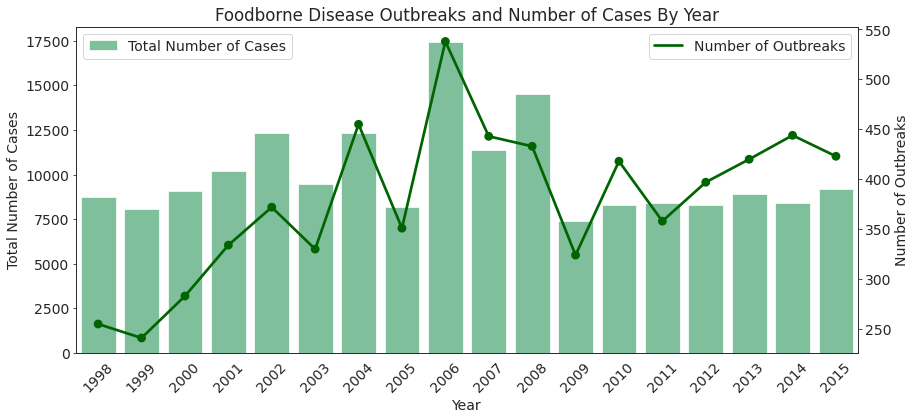

In [ ]:
# Group Confirmed cases by year.
# Subset relevant columns. And calcualte sums. 
Annual_cases=Confirmed_cases.groupby('Year')[
    ['Illnesses', 'Hospitalizations', 'Fatalities']
    ].sum()
# Reset index to convert index to actual column.
Annual_cases=Annual_cases.reset_index()
Annual_cases.columns=['Year',
                        'Total Number of Cases',
                        'Total Number of Hospitalizations',
                        'Total Number of Fatalities']

# Prepare data for number of outbreaks.
# Subset Confirmed cases by year.
# Sort index
# And reset index and turn index to column
Num_of_outbreaks=Confirmed_cases.value_counts(
    subset='Year'
    ).to_frame(
        name='Number of Outbreaks'
        ).sort_index().reset_index()


# Initialize the matplotlib figure
fig, ax = plt.subplots(1,1,figsize=(14, 6))

# Set title
ax.set_title('Foodborne Disease Outbreaks and Number of Cases By Year')

# Sex x axis values rotation
ax.tick_params(axis='x', rotation=45)

# Set style
sns.set_style('white')

# Create barplot
# Set label to 'Total Number of Cases'
# Label will be printed in legend
sns.barplot(data=Annual_cases,
            x='Year',
            y='Total Number of Cases',
            saturation=0.75,
            color='mediumseagreen',
            alpha=0.70,
            ax=ax,
            label='Total Number of Cases')

# Use twinx method to initialize second y axis.
ax2=ax.twinx()

# Create pointplot 
# Set ax argument to ax2
sns.pointplot(data=Num_of_outbreaks,
            x='Year',
            y='Number of Outbreaks',
            color='darkgreen',
            ax=ax2)

# Set barplot legend.
# Label will passed as legend 
ax.legend(loc='upper left')

# Set point plot legend
# Enter Number of Outbreaks to be printed on ax2
ax2.legend(['Number of Outbreaks'],loc="upper right");

In [ ]:
# Descriptive statistics about number of outbreaks.
Num_of_outbreaks.describe().iloc[:,1:]

,Number of Outbreaks
count,18.000000
mean,378.833333
std,76.741162
min,241.000000
25%,331.000000
50%,384.500000
75%,430.500000
max,538.000000


In [ ]:
# Calculating confidence intervals for number of outbreaks.
# t value for df=17 is 2.11
import math
Mean=378.8
Std=76.7
t=2.11
n=18
MOE=round(Std*t/math.sqrt(n))
print('Confidence interval is {} and {}'.format(Mean-MOE,Mean+MOE))

Confidence interval is 340.8 and 416.8


*As expected, the total number of cases peaked in 2006 because the highest number of outbreaks happened in 2006 also (538).  
Mean number of outbreaks is 379 for any given year with standard deviation of 77.  
95% Confidence interval is 340.8 and 416.8*

- Case distribution over months

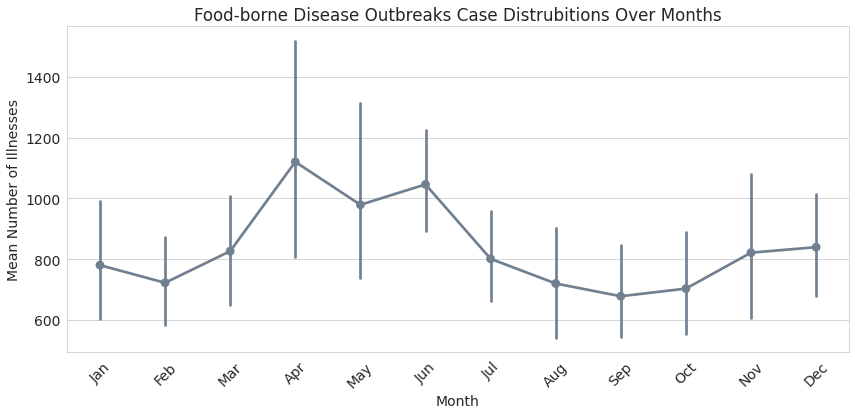

In [ ]:
Month_case=Confirmed_cases.groupby(
    by=['Year','Month']
    )['Illnesses'].sum().reset_index()
Month_case=Month_case.sort_values(by='Month',
                                  key=lambda x: pd.to_datetime(x,
                                                               format="%b"))
# Initialize the matplotlib figure
sns.set_style('whitegrid')
plt.figure(figsize=(14,6))
# Set title
plt.title('Food-borne Disease Outbreaks Case Distrubitions Over Months')
# Sex x axis values rotation
plt.xticks(rotation=45)
# Create bar plot 
sns.pointplot(data=Month_case,
            x='Month',
            y='Illnesses',
            join=True,
            color='slategray',
            errorbar='ci')
plt.ylabel('Mean Number of Illnesses');

*As indicated by this graph, there is an increase of the number of cases related to foodborne disease outbreaks in April, May and June. What about outbreaks over months?*

- Number of outbreaks and months. 

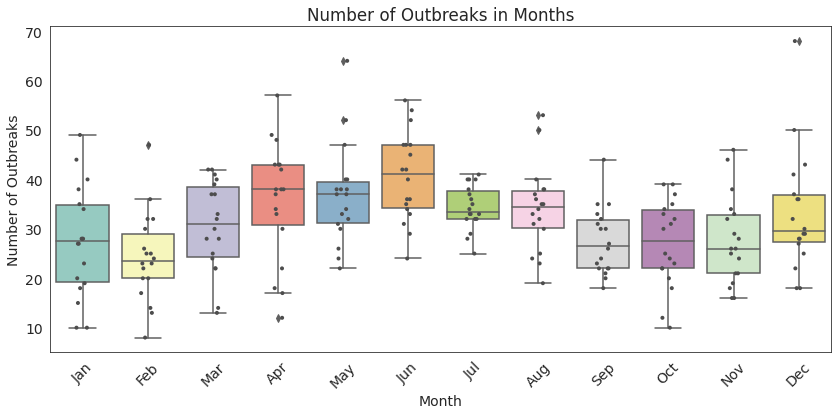

In [ ]:
Month_outbreaks=Confirmed_cases.groupby('Year')['Month'].value_counts()
Month_outbreaks=Month_outbreaks.to_frame(
    name='Number of Outbreaks'
    ).reset_index()

Month_outbreaks=Month_outbreaks.sort_values(
    by='Month',
    key=lambda x: pd.to_datetime(x,
                                 format="%b"))

# Initialize the matplotlib figure
sns.set_style('white')
plt.figure(figsize=(14,6))
# Set title
plt.title('Number of Outbreaks in Months')
# Sex x axis values rotation
plt.xticks(rotation=45)
# Create bar plot 
sns.boxplot(data=Month_outbreaks,
            x='Month',
            y='Number of Outbreaks',
            saturation=0.75,
            palette='Set3',
            showfliers = True)
sns.stripplot(x='Month',
              y='Number of Outbreaks', 
              data=Month_outbreaks,
              size=4,
              color=".3",
              linewidth=0)
plt.ylabel('Number of Outbreaks');

*As expected, April, May, and June have a higher mean number of outbreaks. However, statistical analysis is needed to confirm this visual interpretation.*

- Investigation of mean number of cases and mean number of hospitalized cases for different states related to food-borne disease outbreaks.

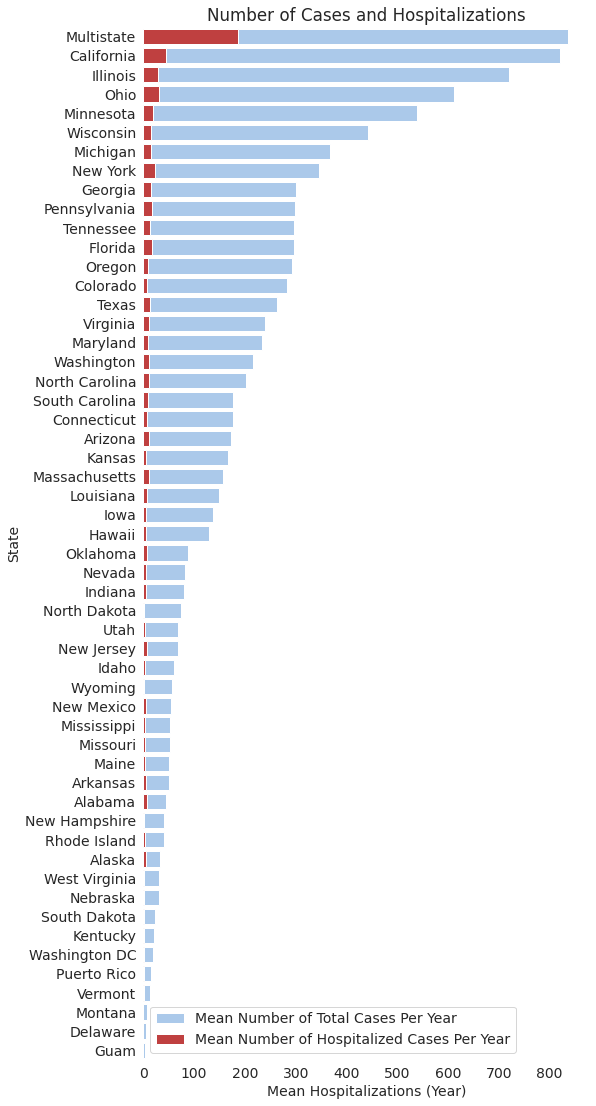

In [ ]:
# Prepeare data
State_cases=Confirmed_cases.groupby('State')[
    ['Illnesses','State code', 'Hospitalizations', 'Fatalities']
    ].sum().sort_values(
                    by=['Illnesses'],
                    ascending=False
        ).reset_index()

# Add mean columns
State_cases['Mean Cases (Year)']= State_cases['Illnesses']/18
State_cases['Mean Hospitalizations (Year)']= State_cases['Hospitalizations']/18

# Initialize the matplotlib figure
plt.figure(figsize=(8,19))

# Plot the total cases
sns.set_color_codes('pastel')
sns.barplot(x='Mean Cases (Year)', 
            y='State',
            data=State_cases,
            label='Mean Number of Total Cases Per Year', 
            color='b'
            )

# Plot the total number of hospitalized cases
sns.set_color_codes('muted')
sns.barplot(x='Mean Hospitalizations (Year)',
            y='State',
            data=State_cases,
            label='Mean Number of Hospitalized Cases Per Year',
            color='red',
            saturation=0.50
            )

# Add a legend and informative axis label
plt.legend(ncol=1, loc='best', frameon=True)
plt.title('Number of Cases and Hospitalizations')
sns.despine(left=True, bottom=True)

*Multistate outbreaks caused more cases and hospitalizations.  
California has the most cases per year, according to our data. Population sizes can affect these kinds of inferences.*

- Mean number of cases related to food borne outbreaks  for each state in US map.

In [ ]:
# Install plotly express and import
!pip install plotly-express
import plotly.express as px

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Create choropleth interactive graph.
px.choropleth(state_codes
              .merge(right=State_cases,
                     on='State',
                     how='right'),
                    locations='State code', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='Mean Cases (Year)',
                    color_continuous_scale='Jet')

- Top 30 pathogenes/toxins that coused food borne disease outbreaks. 


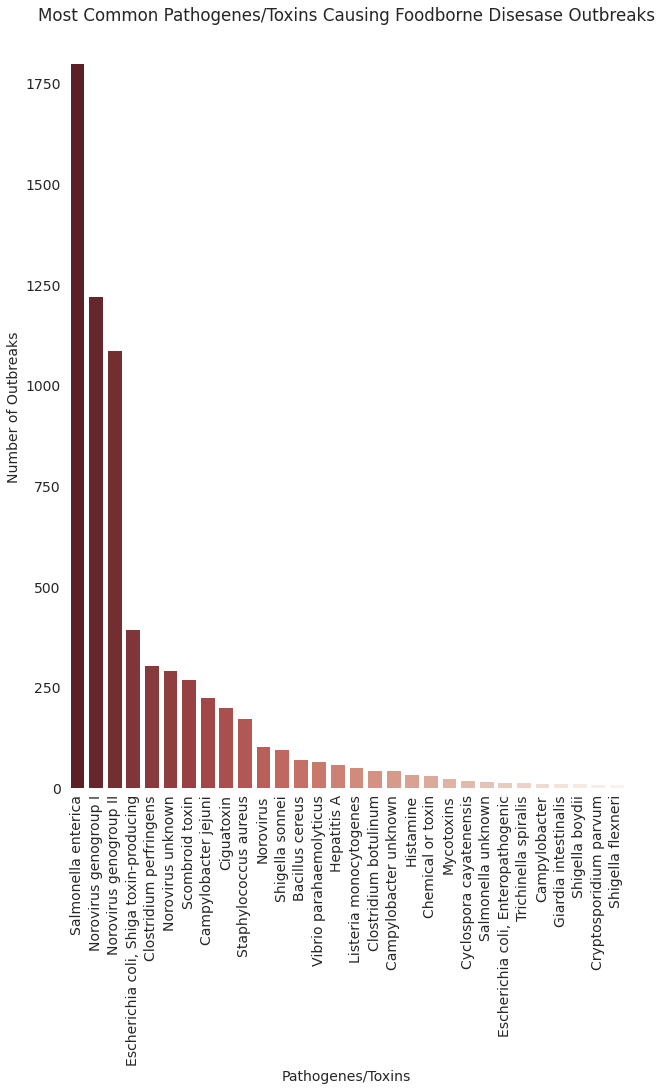

In [ ]:
# Create data 
Top_30=Confirmed_cases['Species'].value_counts().reset_index()
Top_30.columns=['Pathogenes/Toxins','Number of Outbreaks']
# Plot the data
plt.figure(figsize=(10,14))
plt.xticks(rotation=90)
sns.barplot(x='Pathogenes/Toxins',
            y='Number of Outbreaks',
            data=Top_30.head(30),
            label='Mean Number of Hospitalized Cases Per Year',
            palette='Reds_r',
            saturation=0.50
            )
plt.title('Most Common Pathogenes/Toxins Causing Foodborne Disesase Outbreaks')
sns.despine(left=True, bottom=True)

*Salmonella enterica and Norovirus (genogroup 1 and 2 combined ) were responsible for the majority of confirmed outbreaks in USA between '98-2015.*  
*Worldwide,  Campylobacter caused the highest number of annual foodborne disease cases, followed by Salmonella among bacteria as declared by WHO, 2015 data(3).In Europe leading cause of foodborne disease is a virus - Norovirus- similar to USA.(4)*
*According to Europian Food Safety Authority large portion of foodborne outbreaks are caused by bacteria such as Campylobacter, Salmonella, Yersinia, Shigatoxin-producing Escherichia coli, or Listeria monocytogenes.(5)*


- Norovirus outbreak cases disributions. 

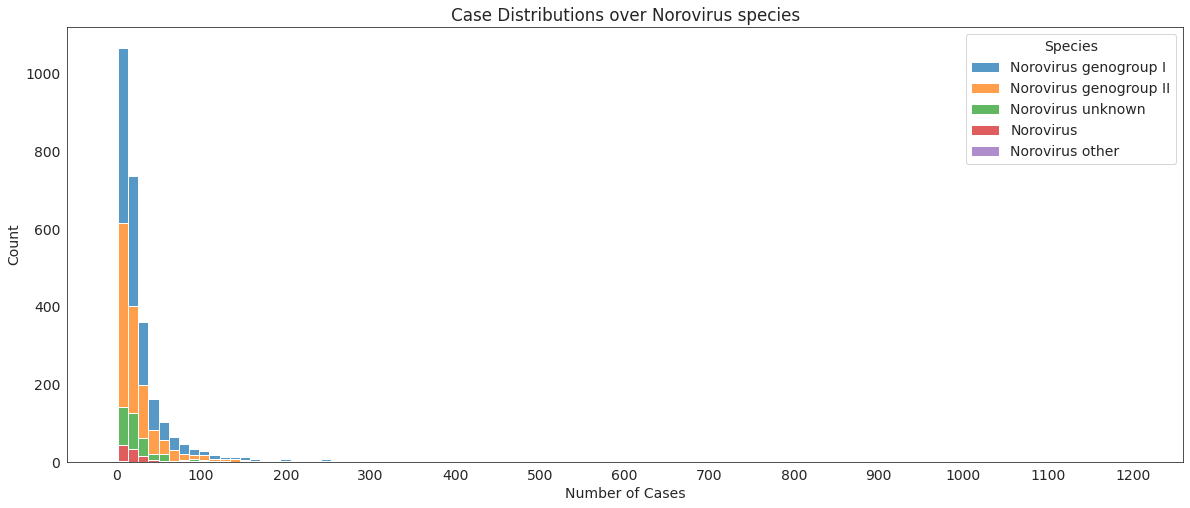

In [ ]:
# Create relevant data
Norovirus_outbreaks=Confirmed_cases[
    Confirmed_cases['Species'].str.startswith('Norovirus')
    ]

# Set figure aspects
plt.figure(figsize=(20,8))

# Create plot
sns.histplot(data=Norovirus_outbreaks,
             x='Illnesses',
             hue='Species',
             bins=100,
             multiple="stack",
            )
plt.xlabel('Number of Cases')
plt.xticks(np.arange(0,1300,100))
plt.title('Case Distributions over Norovirus species');

*In US Norovirus causes the highest number of foodborne illnesses in general.  
Data shows majority of Norovirus outbreaks have 1-100 cases. Norovirus genogroup 1 responsible for most cases.*

- Top 5 Norovirus outbreaks which have most number of cases.

In [ ]:
Norovirus_outbreaks.sort_values(by='Illnesses',
                                ascending=False).head(5)

,State,State code,Year,Month,Location,Food,Ingredient,Species,Serotype/Genotype,Status,Illnesses,Hospitalizations,Fatalities
2717,Colorado,CO,2006,Apr,Not identified,Not identified,Not identified,Norovirus genogroup I,Not identified,Confirmed,1200,1,0
801,Tennessee,TN,2001,Jan,Restaurant,Not identified,Not identified,Norovirus genogroup II,Unknown,Confirmed,811,0,0
3075,New York,NY,2006,Nov,Restaurant,Not identified,Not identified,Norovirus unknown,Not identified,Confirmed,766,27,0
3411,Illinois,IL,2007,Jul,Not identified,Not identified,Not identified,Norovirus genogroup I,Unknown,Confirmed,526,0,0
3743,Ohio,OH,2008,Apr,Restaurant,Not identified,Not identified,Norovirus genogroup II,Unknown,Confirmed,509,0,0


*There is no idenified ingredient for top 5 Norovirus caused outbreaks as in many outbreaks.*

- Detected pathogenes/toxins which cooused multistate outbreaks. 

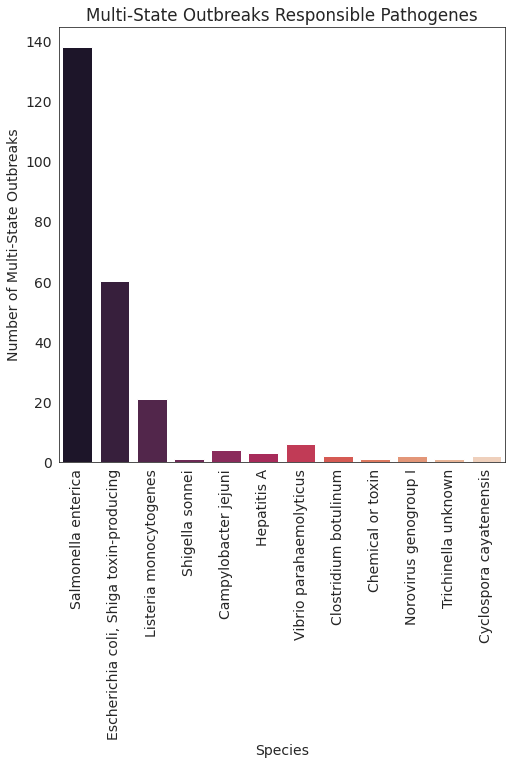

In [ ]:
plt.figure(figsize=(8,8))
plt.xticks(rotation=90)
sns.countplot(data=Confirmed_cases[
    Confirmed_cases['State']=='Multistate'
    ],
    x='Species',
    palette='rocket')
plt.ylabel('Number of Multi-State Outbreaks')
plt.title('Multi-State Outbreaks Responsible Pathogenes');

*Bacterial pathogenes are responsible for the majority of Multistate food borne disease outbreaks.*

Let us save and upload our work to Jovian before continuing

## Asking and Answering Questions

Looking at the data and trying to answer some questions.



#### Q1: What are top 10 most deadly pathogenes/toxins?


In [ ]:
# Calculating cumulative percent fatalities for each species.
Most_fatals=Confirmed_cases.groupby(by='Species')[
    ['Illnesses', 'Fatalities']
    ].sum().reset_index()
Most_fatals['Percent Fatality Rate']=(
    (Most_fatals['Fatalities']/Most_fatals['Illnesses'])*100
).round(1)

# Sorting and listing.
Most_fatals=Most_fatals.sort_values(by='Percent Fatality Rate',
                       ascending=False)
Most_fatals.head(10)

,Species,Illnesses,Fatalities,Percent Fatality Rate
32,Listeria monocytogenes,657,113,17.2
67,Vibrio cholerae,7,1,14.3
35,Mycotoxins,79,6,7.6
47,Rotavirus,96,6,6.2
15,Clostridium botulinum,181,9,5.0
66,Unknown,61,1,1.6
72,Yersinia enterocolitica,70,1,1.4
27,"Escherichia coli, Shiga toxin-producing",7004,33,0.5
30,Hepatitis A,813,4,0.5
49,Salmonella enterica,47606,77,0.2


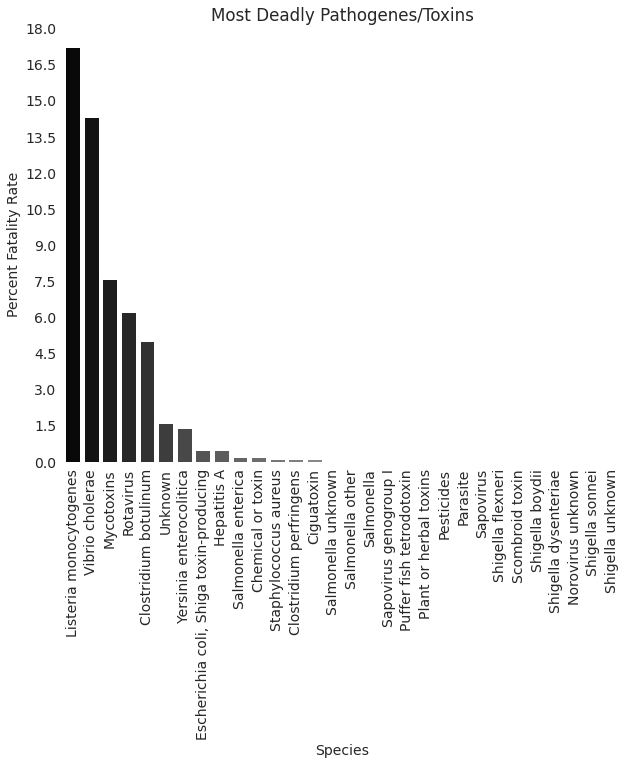

In [ ]:
plt.figure(figsize=(10,8))
plt.xticks(rotation=90)
sns.barplot(
    data=Most_fatals.head(30),
    x='Species',
    y='Percent Fatality Rate',
    palette='Greys_r'
    )
plt.title('Most Deadly Pathogenes/Toxins')
sns.despine(left=True, bottom=True)
plt.yticks(np.arange(0,19,1.5));

*Listeria monocytogenes, Vibrio cholerae and Mycotoxins were responsible for high rate of fatalities.*

#### Q2: What are top 10 ingredients related to Salmonella enterica related foodborne outbreaks?

In [ ]:
Salmonella_ingredient=Confirmed_cases[
    Confirmed_cases['Species']=='Salmonella enterica'
    ]
Salmonella_ingredient=Salmonella_ingredient['Ingredient'].value_counts().reset_index()
Salmonella_ingredient.columns=['Ingredient','Number of Outbreaks']
Salmonella_ingredient.head(10)                                                                                              

,Ingredient,Number of Outbreaks
0,Not identified,1490
1,Egg,80
2,Chicken,54
3,Pork,27
4,Turkey,20
5,Beef,16
6,Egg; Egg,6
7,Vine-Stalk Eg. Tomato,6
8,Sprouts,5
9,Tomato,4


*There is no identified responsible ingredient for large number of outbreaks.  
Egg and chicken are two main suspects when it comes to Salmonella outbreaks.*

#### Q3: What are the most common Salmonella enterica Srotypes/Genotypes? 

In [ ]:
Confirmed_cases[
    Confirmed_cases['Species']=='Salmonella enterica'
    ]['Serotype/Genotype'].value_counts().head(10)

Enteritidis       575
Typhimurium       223
Newport           140
Heidelberg        127
Javiana            55
I 4,[5],12:i:-     48
Braenderup         46
Montevideo         45
Not identified     41
Infantis           39
Name: Serotype/Genotype, dtype: int64

*As expected Salmonella enterica serovar Enteritidis and Typhimurium are responsible of majority of Salmonella outbreaks.*

#### Q4: What are the top 10 ingredients in all outbreaks? And what are the pathogenes/toxins related to them?

In [ ]:
Prominent_ingredients=Confirmed_cases['Ingredient'].value_counts().sort_values(ascending=False).head(10)
Prominent_ingredients

Not identified    5737
Fin Fish           127
Chicken             88
Egg                 83
Beef                67
Pork                57
Turkey              37
Milk                36
Tuna                30
Ground Beef         28
Name: Ingredient, dtype: int64

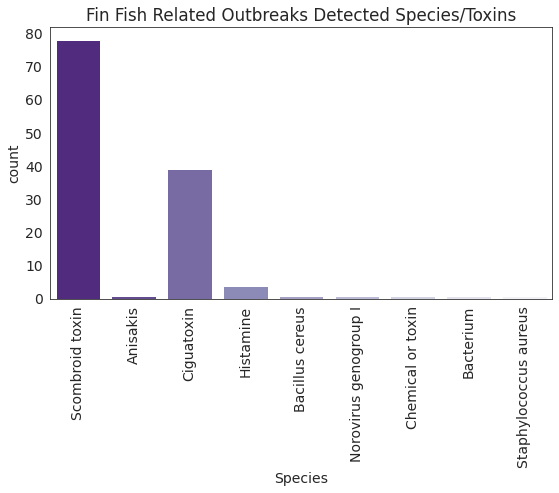

In [ ]:
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Fin Fish Related Outbreaks Detected Species/Toxins')
plt.xlabel('Species/Toxins')
sns.countplot(data=Confirmed_cases[Confirmed_cases['Ingredient']=='Fin Fish'],
              x='Species',
              palette='Purples_r');

*Fin Fish related foodborne outbreaks are largely caused by Scombroid/Ciguatoxin or Histamine.*

#### Q5: What are the largest 10 outbreaks?

In [ ]:
Confirmed_cases.sort_values(by='Illnesses',
                            ascending=False).head(10)

,State,State code,Year,Month,Location,Food,Ingredient,Species,Serotype/Genotype,Status,Illnesses,Hospitalizations,Fatalities
2770,California,CA,2006,May,Prison/Jail,"Other Milk, Pasteurized",Not identified,Campylobacter jejuni,Not identified,Confirmed,1644,7,0
3734,Multistate,NaN,2008,Apr,Not identified,"Peppers, Jalapeno; Tomato, Unspecified; Pepper...",Not identified,Salmonella enterica,Saintpaul,Confirmed,1500,308,2
2717,Colorado,CO,2006,Apr,Not identified,Not identified,Not identified,Norovirus genogroup I,Not identified,Confirmed,1200,1,0
1371,Illinois,IL,2002,Sep,Prison/Jail,"Gravy, Beef; Roast Beef, Unspecified; Potato, ...",Not identified,Clostridium perfringens,Not identified,Confirmed,950,1,0
96,Illinois,IL,1998,Jun,Catering Service,Potato Salad; Macaroni Salad,Not identified,"Escherichia coli, Enterotoxigenic",O6,Confirmed,916,7,0
6629,Multistate,NaN,2015,Jul,Not identified,Cucumber,Not identified,Salmonella enterica,Poona,Confirmed,907,204,6
1774,Louisiana,LA,2003,Nov,Prison/Jail,"Corn, Unspecified",Not identified,Clostridium perfringens,Not identified,Confirmed,880,35,0
801,Tennessee,TN,2001,Jan,Restaurant,Not identified,Not identified,Norovirus genogroup II,Unknown,Confirmed,811,0,0
3366,Illinois,IL,2007,Jun,Restaurant; Fair/Festival,Hummus,Not identified,Salmonella enterica,Heidelberg,Confirmed,802,29,0
3075,New York,NY,2006,Nov,Restaurant,Not identified,Not identified,Norovirus unknown,Not identified,Confirmed,766,27,0


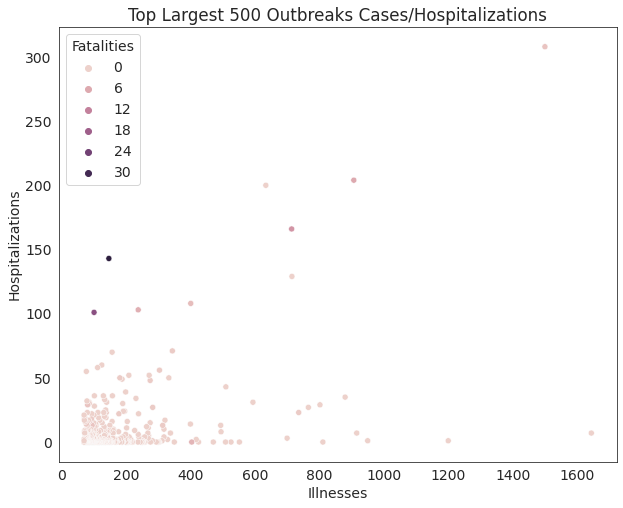

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Top Largest 500 Outbreaks Cases/Hospitalizations')
sns.scatterplot(data=Confirmed_cases.sort_values(by='Illnesses',
                            ascending=False).head(500),
                hue='Fatalities',
                x='Illnesses',
                y='Hospitalizations');

*It is interesting that top ten largest outbreaks has 0-6 number of fatalities.*

Let us save and upload our work to Jovian before continuing.

## Inferences and Conclusion

It is clear that despite the increasing prevention and early warning methods, it is evident that Food-borne disease outbreaks will be around for quite some time.

## References and Future Work

- References.   
    
    1) Lee H, Yoon Y. Etiological Agents Implicated in Foodborne Illness World Wide. Food Sci Anim Resour. 2021 Jan;41(1):1-7. doi: 10.5851/kosfa.2020.e75. Epub 2021 Jan 1. PMID: 33506212; PMCID: PMC7810395.
    
    2) Robert Koch Institute [RKI] Final presentation and evaluation of epidemiological findings in the EHEC O104:H4 outbreak, Germany 2011. RKI; Berlin, Germany: 2011.
    
    3) World Health Organization [WHO] [Access at July 21, 2020];WHO estimates of the global burden of foodborne diseases. 2015

    4) WHO Food Safety Publication V4

    5) https://multimedia.efsa.europa.eu/fbo-storymaps/index.html# 